In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

import scipy

In [2]:
plot_config = {
    "edgecolor": "black",
    "linewidth": 0.5,
    "rot": 0
}

# Semantics

In [14]:
f_res = "semantic/availability/results_enum.diff.csv"
res = pd.read_csv(f_res)
res = res.drop(columns="avg")

res.round(2)

,model,order,semantic,llm
0,llama3.1,63.24,86.49,19.46
1,llama3.2,50.81,78.38,19.46
2,nemo,58.38,93.51,16.76
3,mistral,51.89,76.76,17.30
4,llava,50.81,79.46,16.22
5,idefics2,62.16,81.08,22.70
6,idefics2_img,55.14,78.38,22.16
7,llava_img,55.68,80.00,20.54
8,mixtral,60.54,90.81,14.05
9,llama3.1-70b,65.95,90.27,15.14


# Availability

In [4]:
f_res = "bydiff/availability/results.csv"
res = pd.read_csv(f_res)

res = res.drop(columns="avg")

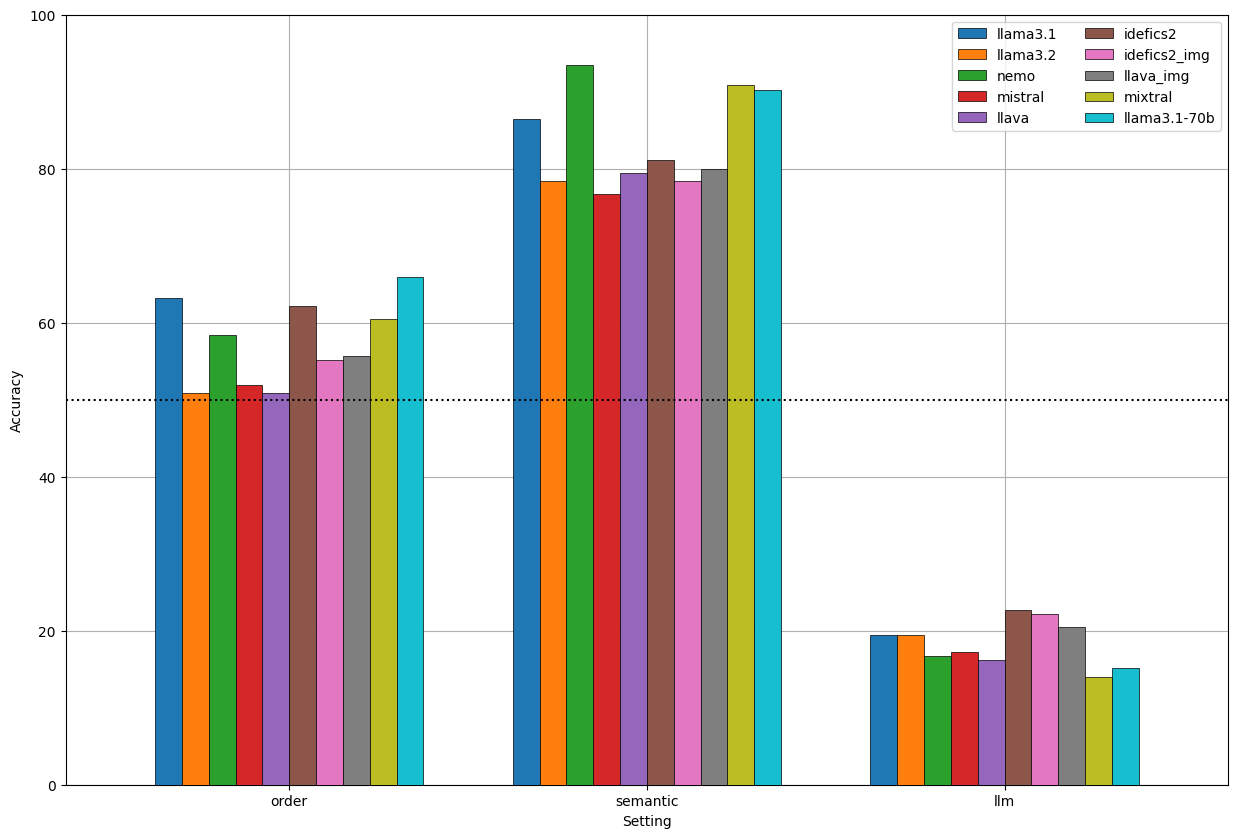

In [20]:
fig, ax = plt.subplots(1, figsize=(15, 10))
res.set_index("model").transpose().plot.bar(ax=ax, **plot_config, ylim=(0, 100), legend=False, zorder=3, width=0.75)
ax.axhline(y=50, color="black", linestyle="dotted", zorder=3) #, label="random", zorder=3)

# ax.set_title("Classification results")
ax.legend(loc="upper right", ncol=res.shape[0] // 2, ncols=2)
ax.grid(zorder=0)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Setting")
fig.show()

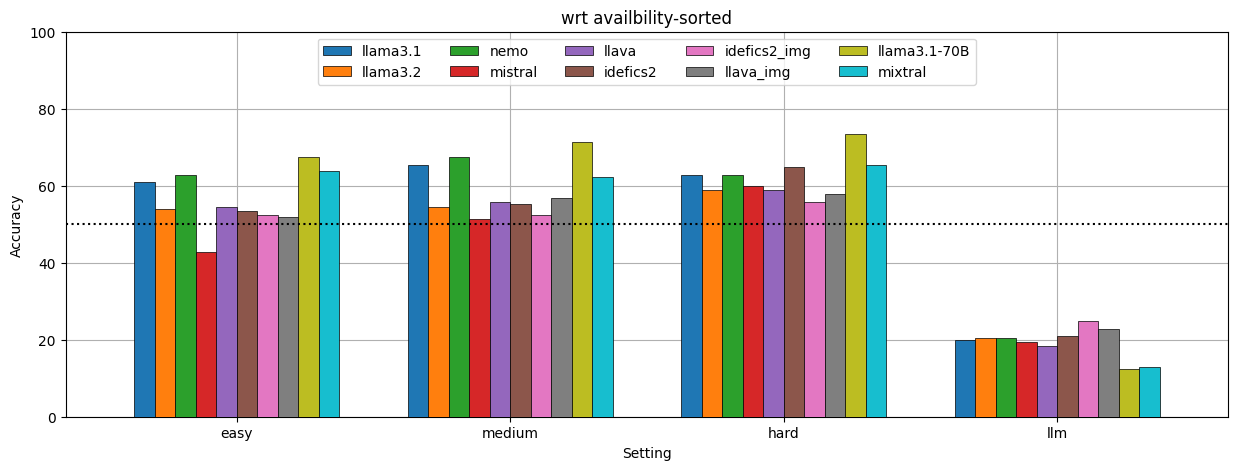

In [6]:
fig, ax = plt.subplots(1, figsize=(15, 5))
res.set_index("model").transpose().plot.bar(ax=ax, **plot_config, ylim=(0, 100), legend=False, zorder=3, width=0.75)
ax.axhline(y=50, color="black", linestyle="dotted", zorder=3) #, label="random", zorder=3)

ax.set_title("wrt availbility-sorted")
ax.legend(loc="upper center", ncol=res.shape[0] // 2)
ax.grid(zorder=0)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Setting")
fig.show()

In [7]:
f_allres = "bydiff/availability/results.annotated.json"

allres = json.load(open(f_allres))

In [43]:
from copy import deepcopy

def get_ppl_scores(model, data, setting="easy"):
    c_ppl = []
    w_ppl = []
    for elem in data:
        elem = deepcopy(elem)
        seq_len = len(elem["data"]["candidates"][setting][0])
        if seq_len <= 4:
            continue
        scores = elem["outputs-human"][model][setting] # TODO change key name
        gt = elem["data"]["answers"][setting]
        c_ppl.append(scores.pop(gt))
        w_ppl.append(scores[0])
    
    return c_ppl, w_ppl
    

In [55]:
a, b = get_ppl_scores("llama3.1-70B", allres, setting=SETTING)

import numpy as np
np.mean(a), np.mean(b)

(6.595123376623377, 7.13579220779221)

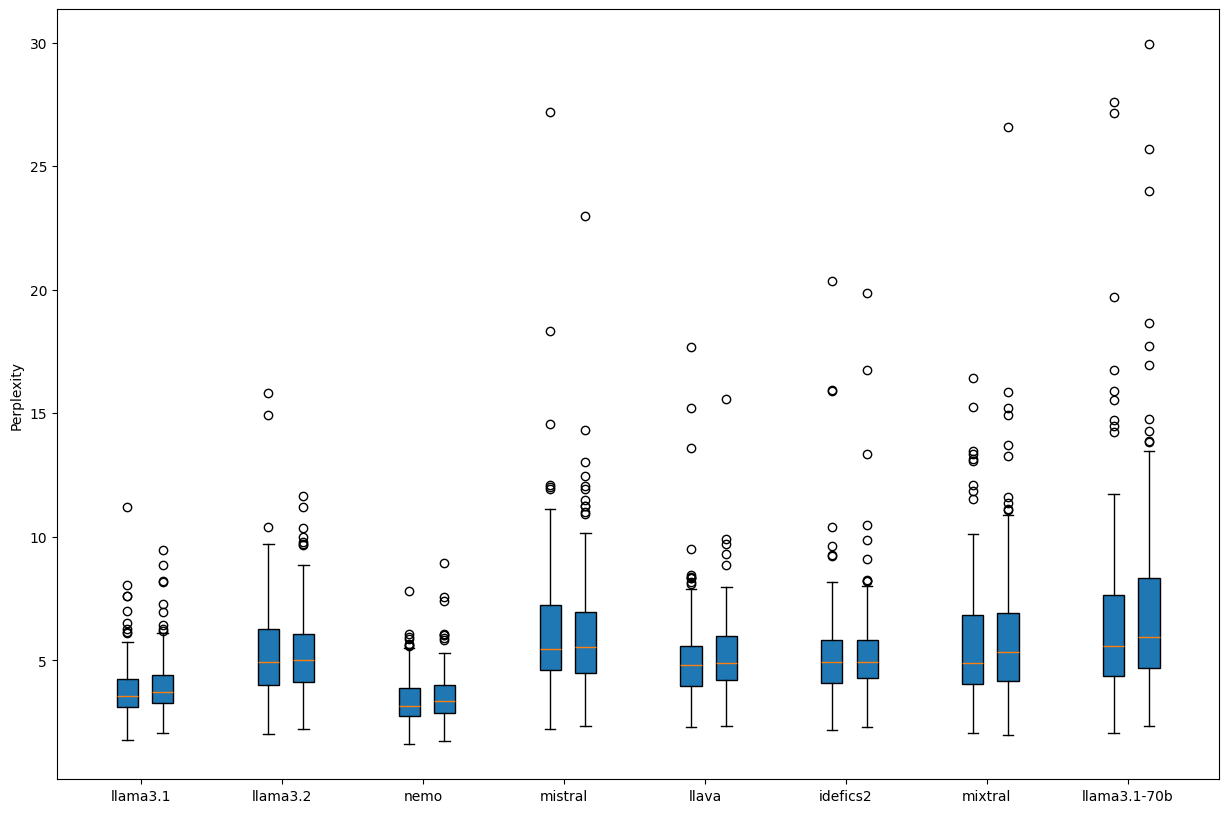

In [56]:
# Example colors for positive and negative boxplots
colors = ['lightgreen', 'lightred']

fig, ax = plt.subplots(1, figsize=(15, 10))

positions_1 = [1, 1.25]
positions_2 = [2, 2.25]
positions_3 = [3, 3.25]
positions_4 = [4, 4.25]
positions_5 = [5, 5.25]
positions_6 = [6, 6.25]
positions_7 = [7, 7.25]
positions_8 = [8, 8.25]

SETTING = "medium"

bp1 = ax.boxplot(get_ppl_scores("llama3.1", allres, setting=SETTING), 
                 positions=positions_1, patch_artist=True)

bp2 = ax.boxplot(get_ppl_scores("llama3.2", allres, setting=SETTING), 
                 positions=positions_2, patch_artist=True)

bp3 = ax.boxplot(get_ppl_scores("nemo", allres, setting=SETTING), 
                 positions=positions_3, patch_artist=True)

bp4 = ax.boxplot(get_ppl_scores("mistral", allres, setting=SETTING), 
                 positions=positions_4, patch_artist=True)

bp5 = ax.boxplot(get_ppl_scores("llava", allres, setting=SETTING), 
                 positions=positions_5, patch_artist=True)

bp6 = ax.boxplot(get_ppl_scores("idefics2", allres, setting=SETTING), 
                 positions=positions_6, patch_artist=True)

bp7 = ax.boxplot(get_ppl_scores("mixtral", allres, setting=SETTING), 
                 positions=positions_7, patch_artist=True)

bp8 = ax.boxplot(get_ppl_scores("llama3.1-70B", allres, setting=SETTING), 
                 positions=positions_8, patch_artist=True)

# # Set colors for both pairs
# for patch, color in zip(bp1['boxes'], colors):
#     patch.set_facecolor(color)
# 
# for patch, color in zip(bp2['boxes'], colors):
#     patch.set_facecolor(color)

# Set x-ticks centered between pairs of positive and negative samples
ax.set_xticks([1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1])
ax.set_xticklabels(['llama3.1', 'llama3.2', "nemo", "mistral", "llava", "idefics2", "mixtral", "llama3.1-70b"])

# Set axis labels
ax.set_ylabel("Perplexity")

plt.show()


# Rank

In [6]:
f_res = "bydiff/rank/results_enum.diff.csv"
res = pd.read_csv(f_res)

res = res.drop(columns="avg")

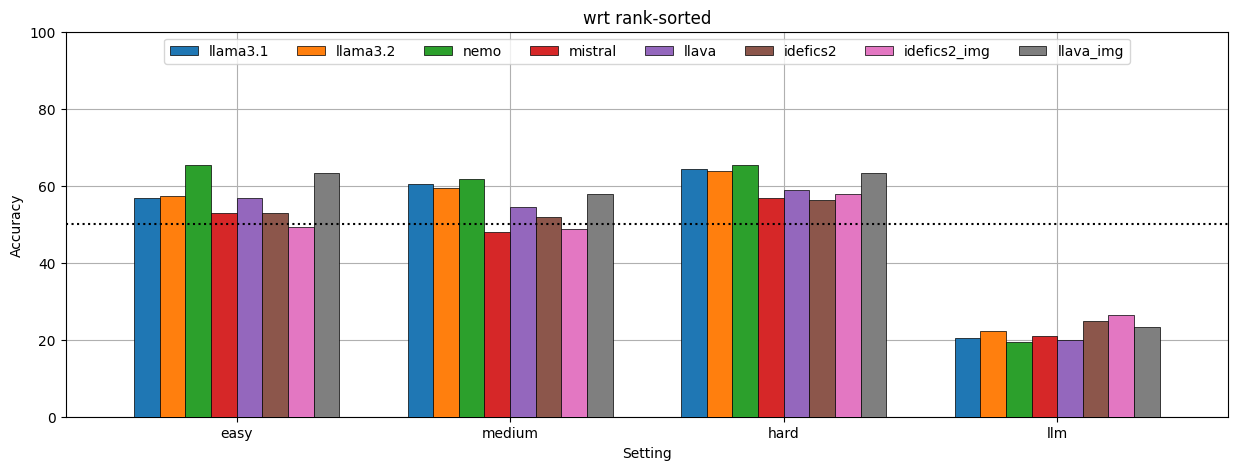

In [7]:
fig, ax = plt.subplots(1, figsize=(15, 5))
res.set_index("model").transpose().plot.bar(ax=ax, **plot_config, ylim=(0, 100), legend=False, zorder=3, width=0.75)
ax.axhline(y=50, color="black", linestyle="dotted", zorder=3)#, label="random", zorder=3)

ax.set_title("wrt rank-sorted")
ax.legend(loc="upper center", ncol=res.shape[0]+1)
ax.grid(zorder=0)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Setting")
fig.show()

In [16]:
res[["easy", "medium", "hard"]].mean(axis=1), res

(0    60.540541
 1    60.180180
 2    64.144144
 3    52.612613
 4    56.756757
 5    53.693694
 6    51.891892
 7    61.441441
 dtype: float64,
           model       easy     medium       hard        llm
 0      llama3.1  56.756757  60.540541  64.324324  20.540541
 1      llama3.2  57.297297  59.459459  63.783784  22.162162
 2          nemo  65.405405  61.621622  65.405405  19.459459
 3       mistral  52.972973  48.108108  56.756757  21.081081
 4         llava  56.756757  54.594595  58.918919  20.000000
 5      idefics2  52.972973  51.891892  56.216216  24.864865
 6  idefics2_img  49.189189  48.648649  57.837838  26.486486
 7     llava_img  63.243243  57.837838  63.243243  23.243243)

In [93]:
f_allres = "bydiff/rank/results_enum.diff.annotated.json"

allres = json.load(open(f_allres))

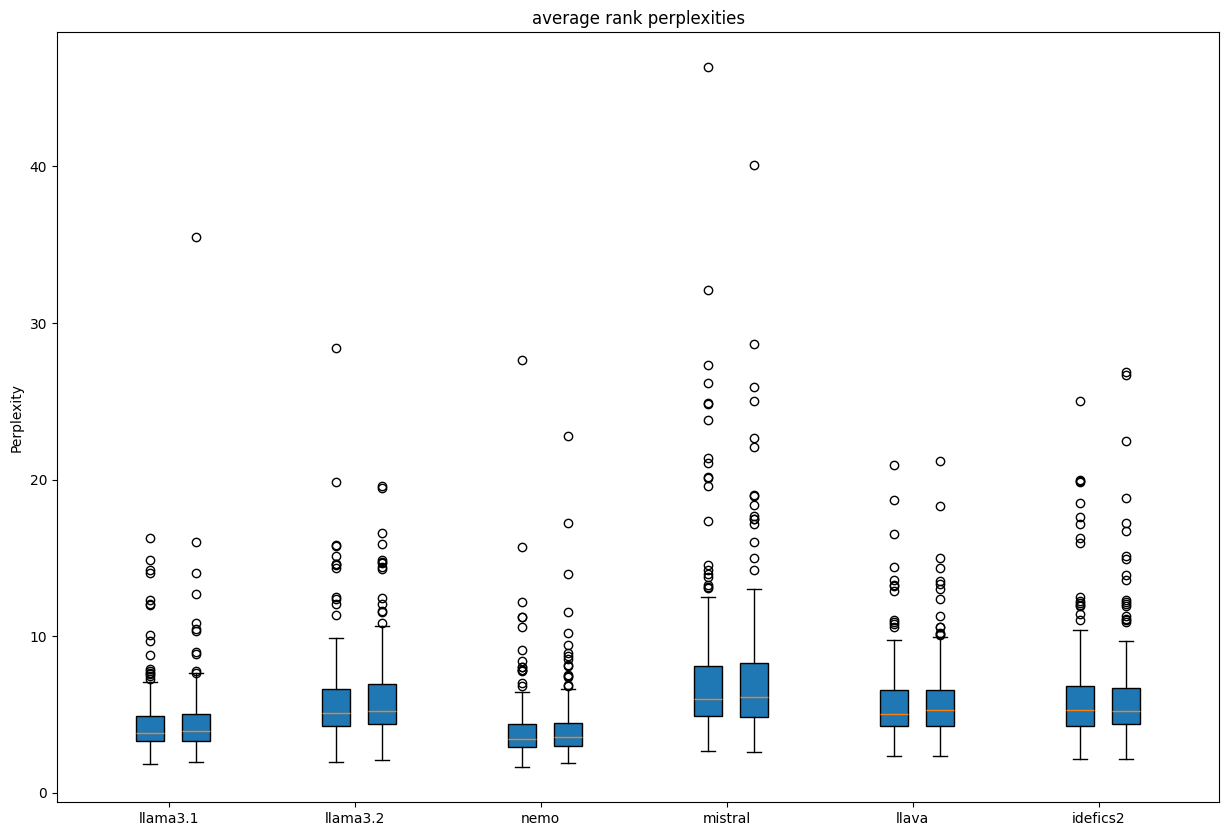

In [95]:
# Example colors for positive and negative boxplots
colors = ['lightblue', 'lightgreen']

fig, ax = plt.subplots(1, figsize=(15, 10))

positions_1 = [1, 1.25]
positions_2 = [2, 2.25]
positions_3 = [3, 3.25]
positions_4 = [4, 4.25]
positions_5 = [5, 5.25]
positions_6 = [6, 6.25]

SETTING = "medium"

bp1 = ax.boxplot(get_ppl_scores("llama3.1", allres, setting=SETTING), 
                 positions=positions_1, patch_artist=True)

bp2 = ax.boxplot(get_ppl_scores("llama3.2", allres, setting=SETTING), 
                 positions=positions_2, patch_artist=True)

bp3 = ax.boxplot(get_ppl_scores("nemo", allres, setting=SETTING), 
                 positions=positions_3, patch_artist=True)

bp4 = ax.boxplot(get_ppl_scores("mistral", allres, setting=SETTING), 
                 positions=positions_4, patch_artist=True)

bp5 = ax.boxplot(get_ppl_scores("llava", allres, setting=SETTING), 
                 positions=positions_5, patch_artist=True)

bp6 = ax.boxplot(get_ppl_scores("idefics2", allres, setting=SETTING), 
                 positions=positions_6, patch_artist=True)

# # Set colors for both pairs
# for patch, color in zip(bp1['boxes'], colors):
#     patch.set_facecolor(color)
# 
# for patch, color in zip(bp2['boxes'], colors):
#     patch.set_facecolor(color)

# Set x-ticks centered between pairs of positive and negative samples
ax.set_xticks([1.1, 2.1, 3.1, 4.1, 5.1, 6.1])
ax.set_xticklabels(['llama3.1', 'llama3.2', "nemo", "mistral", "llava", "idefics2"])

# Set axis labels
ax.set_ylabel("Perplexity")

ax.set_title("average rank perplexities")

plt.show()